# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [134]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [135]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

##### > Overall Info (+info on columns)

In [136]:
customers.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [137]:
customers.shape

(440, 8)

In [138]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [139]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [140]:
# Deep anylisis on columns meaning
x_variables = customers.columns
for var in x_variables:
    print(var,customers[var].unique(),"\n")

Channel [2 1] 

Region [3 1 2] 

Fresh [ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  12212  11170  36050  76237  19219  21465    140  42312
   7149   2101  14903   9434   7388   

In [141]:
print(x_variables[0],": Type of channel (retail or Hotel/restaurant/cafe)")
print(x_variables[1],": Type of region channel (lisbon or porto or other)")
print(x_variables[2],": Anual spending on fresh products")
print(x_variables[3],": Anual spending on milk products")
print(x_variables[4],": Anual spending on grocery products")
print(x_variables[5],": Anual spending on frozen products")
print(x_variables[6],": Anual spending on detergent and paper products")
print(x_variables[7],": Anual spending on Delicassen products")

Channel : Type of channel (retail or Hotel/restaurant/cafe)
Region : Type of region channel (lisbon or porto or other)
Fresh : Anual spending on fresh products
Milk : Anual spending on milk products
Grocery : Anual spending on grocery products
Frozen : Anual spending on frozen products
Detergents_Paper : Anual spending on detergent and paper products
Delicassen : Anual spending on Delicassen products


In [142]:
# Now we know that though all data is numbers and therefor identified as int, some of the columns (like Channel and REgion)
# are categoric and so need to be rivised

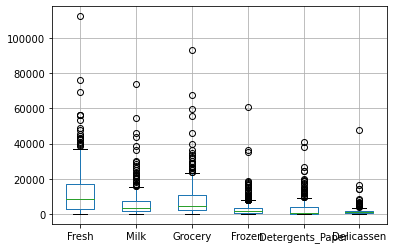

In [143]:
var_plot = customers.drop([x_variables[0],x_variables[1]],axis=1,inplace=False).columns
customers.boxplot(column=list(var_plot))

##### > Cleanning

In [144]:
#No null values in the horizon 
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [145]:
#outlier check (using 3std as boundary)
outliers = customers.iloc[np.where(np.abs(stats.zscore(customers)) > 3)[0]]
print("Nº outliers:",len(outliers))

Nº outliers: 43


##### > Correlations

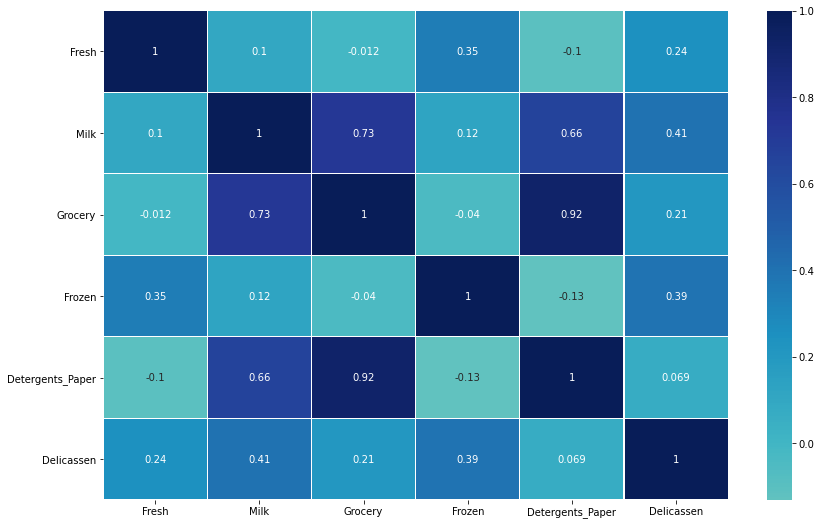

In [146]:
numeric_variables = customers.drop([x_variables[0],x_variables[1]],axis=1,inplace=False)
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(numeric_variables.corr(), annot=True, cmap="YlGnBu", center=0,linewidths=.2)

##### > Pareto

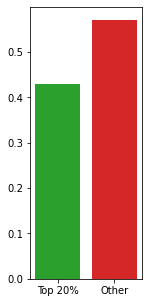

In [154]:
customers["% Sales"] = numeric_variables.sum(axis=1)/numeric_variables.values.sum()
customer_top20 = customers.nlargest(n= round(0.2*len(customers)),columns="% Sales")
sales_responsible = np.sum(customer_top20["% Sales"])

fig, ax = plt.subplots(figsize=(2,5))
ax.bar("Top 20%", sales_responsible, color="C2")
ax.bar("Other", (1-sales_responsible), color="C3")
ax.tick_params(axis="y")
plt.show()

customers.drop("% Sales",axis=1,inplace=True)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [109]:
clean_customers = customers.copy()

In [110]:
# In terms of nulls no cleaning required. the outliers could be eliminated and I will do so (though eliminating 47 values is sad)
clean_customers.drop(outliers.index, inplace=True)

In [111]:
#I also would like to transform the categorical variables in binary ones and hot encode if more than 2 options, but I don't know 
#if that falls under data cleaning so I won't do it for now

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
scaler = StandardScaler().fit(clean_customers)
customers_scale = scaler.transform(clean_customers)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [182]:
from sklearn.cluster import KMeans

In [183]:
kmeans = KMeans().fit(customers_scale)
clean_customers["labels"] = kmeans.labels_

Count the values in `labels`.

In [184]:
print("Number of results:",len(kmeans.labels_),"\nNumber of clusters:",clean_customers["labels"].nunique())

Number of results: 414 
Number of clusters: 8


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [185]:
from sklearn.cluster import DBSCAN

In [186]:
cluster = DBSCAN(eps=0.5).fit(customers_scale)
clean_customers['labels_DBSCAN'] = cluster.labels_

Count the values in `labels_DBSCAN`.

In [187]:
print("Number of results:",len(cluster.labels_),"\nNumber of clusters:",clean_customers["labels_DBSCAN"].nunique())

Number of results: 414 
Number of clusters: 2


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

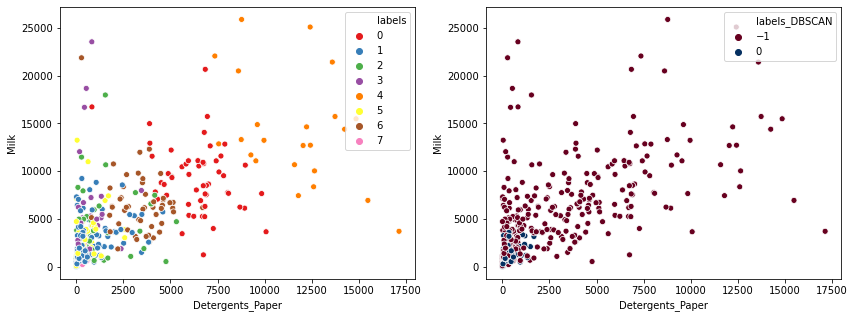

In [225]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.scatterplot(clean_customers["Detergents_Paper"],clean_customers["Milk"],hue=clean_customers["labels"], palette="Set1", ax=ax[0])
sns.scatterplot(clean_customers["Detergents_Paper"],clean_customers["Milk"],hue=clean_customers["labels_DBSCAN"],palette ="RdBu", ax=ax[1])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

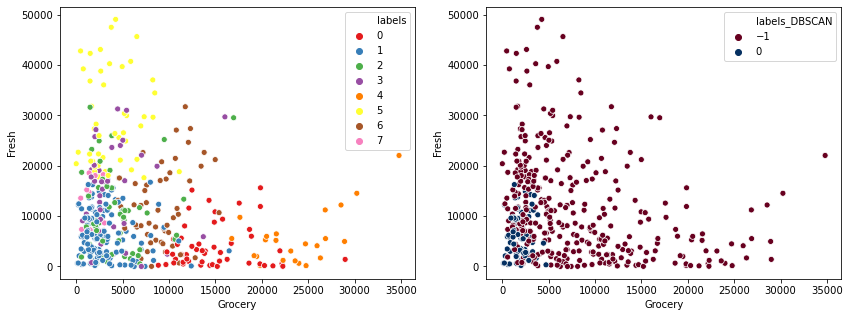

In [224]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.scatterplot(clean_customers["Grocery"],clean_customers["Fresh"],hue=clean_customers["labels"], palette="Set1", ax=ax[0])
sns.scatterplot(clean_customers["Grocery"],clean_customers["Fresh"],hue=clean_customers["labels_DBSCAN"],palette ="RdBu", ax=ax[1])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

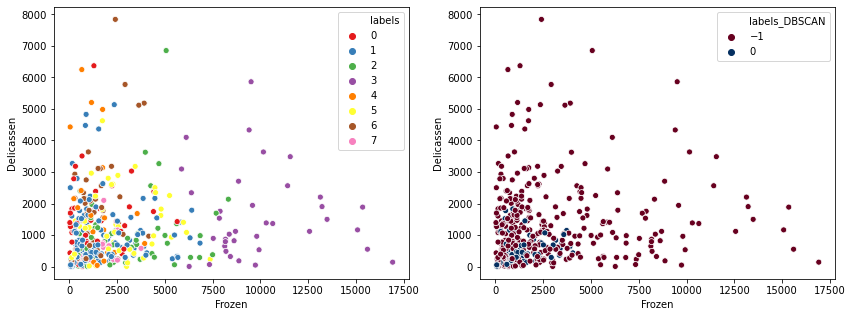

In [226]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.scatterplot(clean_customers["Frozen"],clean_customers["Delicassen"],hue=clean_customers["labels"], palette="Set1", ax=ax[0])
sns.scatterplot(clean_customers["Frozen"],clean_customers["Delicassen"],hue=clean_customers["labels_DBSCAN"],palette ="RdBu", ax=ax[1])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [210]:
labels_join = clean_customers.groupby("labels").mean()
labelsDBSCAN_join = clean_customers.groupby("labels_DBSCAN").mean()

In [211]:
print(labelsDBSCAN_join)
labels_join

                Channel   Region         Fresh         Milk      Grocery  \
labels_DBSCAN                                                              
-1             1.379009  2.45481  11641.819242  5565.478134  7822.857143   
 0             1.000000  3.00000   6218.647887  1521.352113  1940.478873   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             2781.938776       2779.647230  1377.119534  2.988338  
 0             1428.915493        410.788732   565.563380  1.000000  


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.923077,2.576923,3999.230769,9225.788462,14904.211538,1217.846154,6426.365385,1289.596154,-1.000000
1,1.000000,2.962687,6344.835821,2471.597015,3129.313433,1632.776119,664.402985,928.022388,-0.470149
2,1.055556,1.240741,10181.185185,3497.851852,4291.259259,2876.037037,1051.500000,1035.000000,-1.000000
3,1.054054,2.729730,14733.783784,4956.108108,4348.270270,9922.783784,644.459459,1603.162162,-1.000000
4,2.000000,2.391304,5630.652174,14127.913043,23819.782609,1412.826087,11567.043478,1831.000000,-1.000000
5,1.042553,2.872340,28901.212766,3138.510638,3875.851064,2566.510638,635.382979,1289.787234,-1.000000
6,1.981132,2.867925,12012.132075,6516.018868,9072.452830,1379.641509,3383.188679,1752.415094,-1.000000
7,1.000000,1.000000,11218.642857,1141.357143,1656.642857,1774.785714,253.142857,733.928571,-1.000000


Which algorithm appears to perform better?

In [ ]:
# Straight away the DBSCAN identified fewer clusters making it easier to 
# see that between the clusters, for each column the mean of values is 
# relatively different from one another. On the other hand (and as a byproduct
# of so many clusters being identified) with the kmean the difference isn't
# as clear, for instance clusters 2,3 and 5 have a similar mean for channel,
# similarly in other columns (for the kmean) a closness of some means can be found
# which is indicative of a bad clustering. Neverthelesss the final cluster being
# good depends on the impact of all varibles. This being said, the DBSCAN appears
# to be better, which comes in part due to the small number of clusters that 
# it identifies, which might also mean it isn't catching all the possible cluster
# (>2) that actually exist.

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here